#### 📦 1 | Configuration
---

**1.1 | Install required packages**

In [ ]:
# Install required packages
!pip install notion-client >/dev/null

**1.2 | Import required packages**

In [ ]:
# Import required packages
from    notion_client import Client
import  pandas as pd
from    plotnine import *
from    google.colab import files
import  os

**1.3 | Upload config file containing Notion API token**

In [ ]:
uploaded = files.upload()

Saving config.txt to config (1).txt


**1.4 | Extract the Notion API token value from the config file**

In [ ]:
# Specify the file name (e.g., 'config.txt')
file_name = 'config.txt'

# Read the file and set the environment variable
with open(file_name, 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        if key == 'NOTION_API_TOKEN':
            os.environ[key] = value

# Assign Notion API token to variable
notion_api_token = os.environ['NOTION_API_TOKEN']

#### 🔧 2 | Parameters
---

In [19]:
# Define the database ID in Notion - get via 'Share -> Share -> Copy Link'
database_id = "1592a60c49968067a848ed004dae4c3c"

#### 🚰 3 | Import Data
---

**3.1 | Create Notion Client**

In [20]:
# Create the Notion Client
notion = Client(auth=notion_api_token)

**3.2 | Import table data from Notion**

In [22]:
# Query the database
response = notion.databases.query(database_id=database_id)

# Extract the results from the response
results = response['results']

# Convert the list of results into a pandas DataFrame
df_results_raw = pd.DataFrame(results)

# Print the raw response to see its structure
df_results_raw.head(5)

,object,id,created_time,last_edited_time,created_by,last_edited_by,cover,icon,parent,archived,in_trash,properties,url,public_url
0,page,1592a60c-4996-812e-a3c2-d015b505d02e,2024-12-11T18:45:00.000Z,2024-12-11T18:45:00.000Z,"{'object': 'user', 'id': 'bf979852-d96d-47fd-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇨🇦'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Other Reseachers': {'id': '%3C%3Bsl', 'type'...",https://www.notion.so/University-of-Montreal-1...,https://crunchme.notion.site/University-of-Mon...
1,page,1592a60c-4996-8125-95be-d11dc7f6c786,2024-12-11T18:45:00.000Z,2024-12-11T18:45:00.000Z,"{'object': 'user', 'id': 'bf979852-d96d-47fd-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇬🇧'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Other Reseachers': {'id': '%3C%3Bsl', 'type'...",https://www.notion.so/The-Quadram-Institute-Un...,https://crunchme.notion.site/The-Quadram-Insti...
2,page,1592a60c-4996-81b1-8970-f7b9204f13b9,2024-12-11T18:45:00.000Z,2024-12-11T18:45:00.000Z,"{'object': 'user', 'id': 'bf979852-d96d-47fd-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇳🇴'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Other Reseachers': {'id': '%3C%3Bsl', 'type'...",https://www.notion.so/University-of-Oslo-1592a...,https://crunchme.notion.site/University-of-Osl...
3,page,1592a60c-4996-81fa-a4b3-f365fea8332f,2024-12-11T18:45:00.000Z,2024-12-11T18:45:00.000Z,"{'object': 'user', 'id': 'bf979852-d96d-47fd-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇩🇪'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Other Reseachers': {'id': '%3C%3Bsl', 'type'...",https://www.notion.so/University-of-Bonn-1592a...,https://crunchme.notion.site/University-of-Bon...
4,page,1592a60c-4996-813e-8f40-f7dbe29ab080,2024-12-11T18:45:00.000Z,2024-12-11T18:45:00.000Z,"{'object': 'user', 'id': 'bf979852-d96d-47fd-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇳🇴'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Other Reseachers': {'id': '%3C%3Bsl', 'type'...",https://www.notion.so/Haukeland-University-Hos...,https://crunchme.notion.site/Haukeland-Univers...


#### 🧹 4 | Tidying Data
---

**4.1 | Define helper function for handling each type of property in Notion database**

In [23]:
# Property: Date
def get_date_value(property_obj):
    """Extract the start date from a 'date' property."""
    if property_obj is None:  # Check if the entire property object is None
        return None
    if not isinstance(property_obj, dict):  # Ensure property_obj is a dictionary
        return None
    date_obj = property_obj.get("date", {})
    if not isinstance(date_obj, dict):  # Ensure date_obj is a dictionary
        return None
    return date_obj.get("start", None)  # Returns the start date or None if unavailable

# Property: Title
def get_title_value(property_obj):
    """Extract the plain text from a 'title' property."""
    title_list = property_obj.get("title", [])
    return title_list[0]["plain_text"] if title_list else ""

# Property: Text
def get_rich_text_value(property_obj):
    """Extract the plain text from a 'rich_text' property."""
    rich_list = property_obj.get("rich_text", [])
    return rich_list[0]["plain_text"] if rich_list else ""

# Property: Select
def get_select_value(property_obj):
    """Extract the 'name' from a 'select' property."""
    select_obj = property_obj.get("select", {})
    return select_obj.get("name", "")

# Property: Multi-Select
def get_multi_select_value(property_obj):
    """Extract all 'name' values from a 'multi_select' property as a comma-separated string."""
    ms_list = property_obj.get("multi_select", [])
    return ", ".join([item["name"] for item in ms_list])

# Property: Number
def get_number_value(property_obj):
    """Extract the numeric value from a 'number' property (e.g., a year)."""
    return property_obj.get("number", None)

# Property: URL
def get_url_value(property_obj):
    """Extract the URL string from a 'url' property."""
    return property_obj.get("url", "")

# Property: Checkbox
def get_checkbox_value(property_obj):
    """Extract the boolean value from a 'checkbox' property."""
    return property_obj.get("checkbox", False)

# Property: Email
def get_email_value(property_obj):
    """Extract the email address from an 'email' property."""
    return property_obj.get("email", "")

# Property: Phone Number
def get_phone_value(property_obj):
    """Extract the phone number from a 'phone_number' property."""
    return property_obj.get("phone_number", "")

# Property: Files
def get_files_value(property_obj):
    """Extract the file URLs from a 'files' property as a list."""
    files_list = property_obj.get("files", [])
    return [file["file"]["url"] for file in files_list if "file" in file]


**4.2 | Parse rows for each of the columns in the Notion database**

In [ ]:
# Create an empty list to store parsed rows
parsed_rows = []

# Iterate through each item in the results
for page in results:
    props = page["properties"]

    # Create a dictionary for this row
    row_data = {}

    # Name (title property)
    row_data["Name"] = get_title_value(props["Name"])

    # Interventions (multi_select)
    row_data["Interventions"] = get_multi_select_value(props["Interventions"])

    # Status (select)
    row_data["Status"] = get_select_value(props["Status"])

    # Primary Completion Date (date)
    row_data["Primary Completion Date"] = get_date_value(props["Primary Completion Date"])

    # Disease(s) (multi_select)
    row_data["Disease(s)"] = get_multi_select_value(props["Disease(s)"])

    # Trial Details (url)
    row_data["Trial Details"] = get_url_value(props["Trial Details"])

    # Sponsor Institution (rich_text)
    row_data["Sponsor Institution"] = get_rich_text_value(props["Sponsor Institution"])

    # Phase (select)
    row_data["Phase"] = get_select_value(props["Phase"])

    # Trial Locations (multi_select)
    row_data["Trial Locations"] = get_multi_select_value(props["Trial Locations"])

    # Add the parsed row dictionary to the list
    parsed_rows.append(row_data)

# Convert to a Pandas DataFrame
df_trials = pd.DataFrame(parsed_rows)

# Ensure 'Primary Completion Date' is in datetime format
df_trials['Primary Completion Date'] = pd.to_datetime(df_trials['Primary Completion Date'], errors='coerce')

# Check the resulting DataFrame
df_trials

,Name,Interventions,Status,Primary Completion Date,Disease(s),Trial Details,Sponsor Institution,Phase,Trial Locations
0,RECOVER-TLC,,Not started,NaT,Long Covid,None,NIH,,United States
1,Somatropin,Somatropin,In progress,2023-10-04,Long Covid,https://clinicaltrials.gov/study/NCT03554265#s...,,,
2,PREVAIL-LC,Ensitrelvir,In progress,2025-03-31,Long Covid,https://clinicaltrials.gov/study/NCT06161688,UCSF,,
3,SOLIDARITY Finland,Infliximab,In progress,2024-12-01,Long Covid,https://clinicaltrials.gov/study/NCT05220280,University of Helsinki,,
4,SOLIDARITY Finland,Imatinib,In progress,2024-12-01,Long Covid,https://clinicaltrials.gov/study/NCT05220280,,,
...,...,...,...,...,...,...,...,...,...
82,REGAIN,Oxaloacetate,In progress,2023-12-31,"Long Covid, ME/CFS (Post-COVID)",https://clinicaltrials.gov/study/NCT05840237,"Terra Biological LLC, Bateman Horne Center",,United States
83,PYCNOVID,Pycnogenol,In progress,2024-11-05,Long Covid,https://clinicaltrials.gov/study/NCT05890534,University of Zurich,,Switzerland
84,Masitinib for the Treatment of Severe MCAS,Masitinib,In progress,2024-12-31,MCAS,https://clinicaltrials.gov/study/NCT05449444?c...,AB Science,,"France, United States"
85,RECLAIM-HBOT,Hyperbaric Oxygen Therapy,In progress,2026-05-01,Long Covid,https://clinicaltrials.gov/study/NCT05513560?c...,"University Health Network, Toronto",,Canada


#### 📊 5 | Visualisation
---

##### 5.1 | By Country

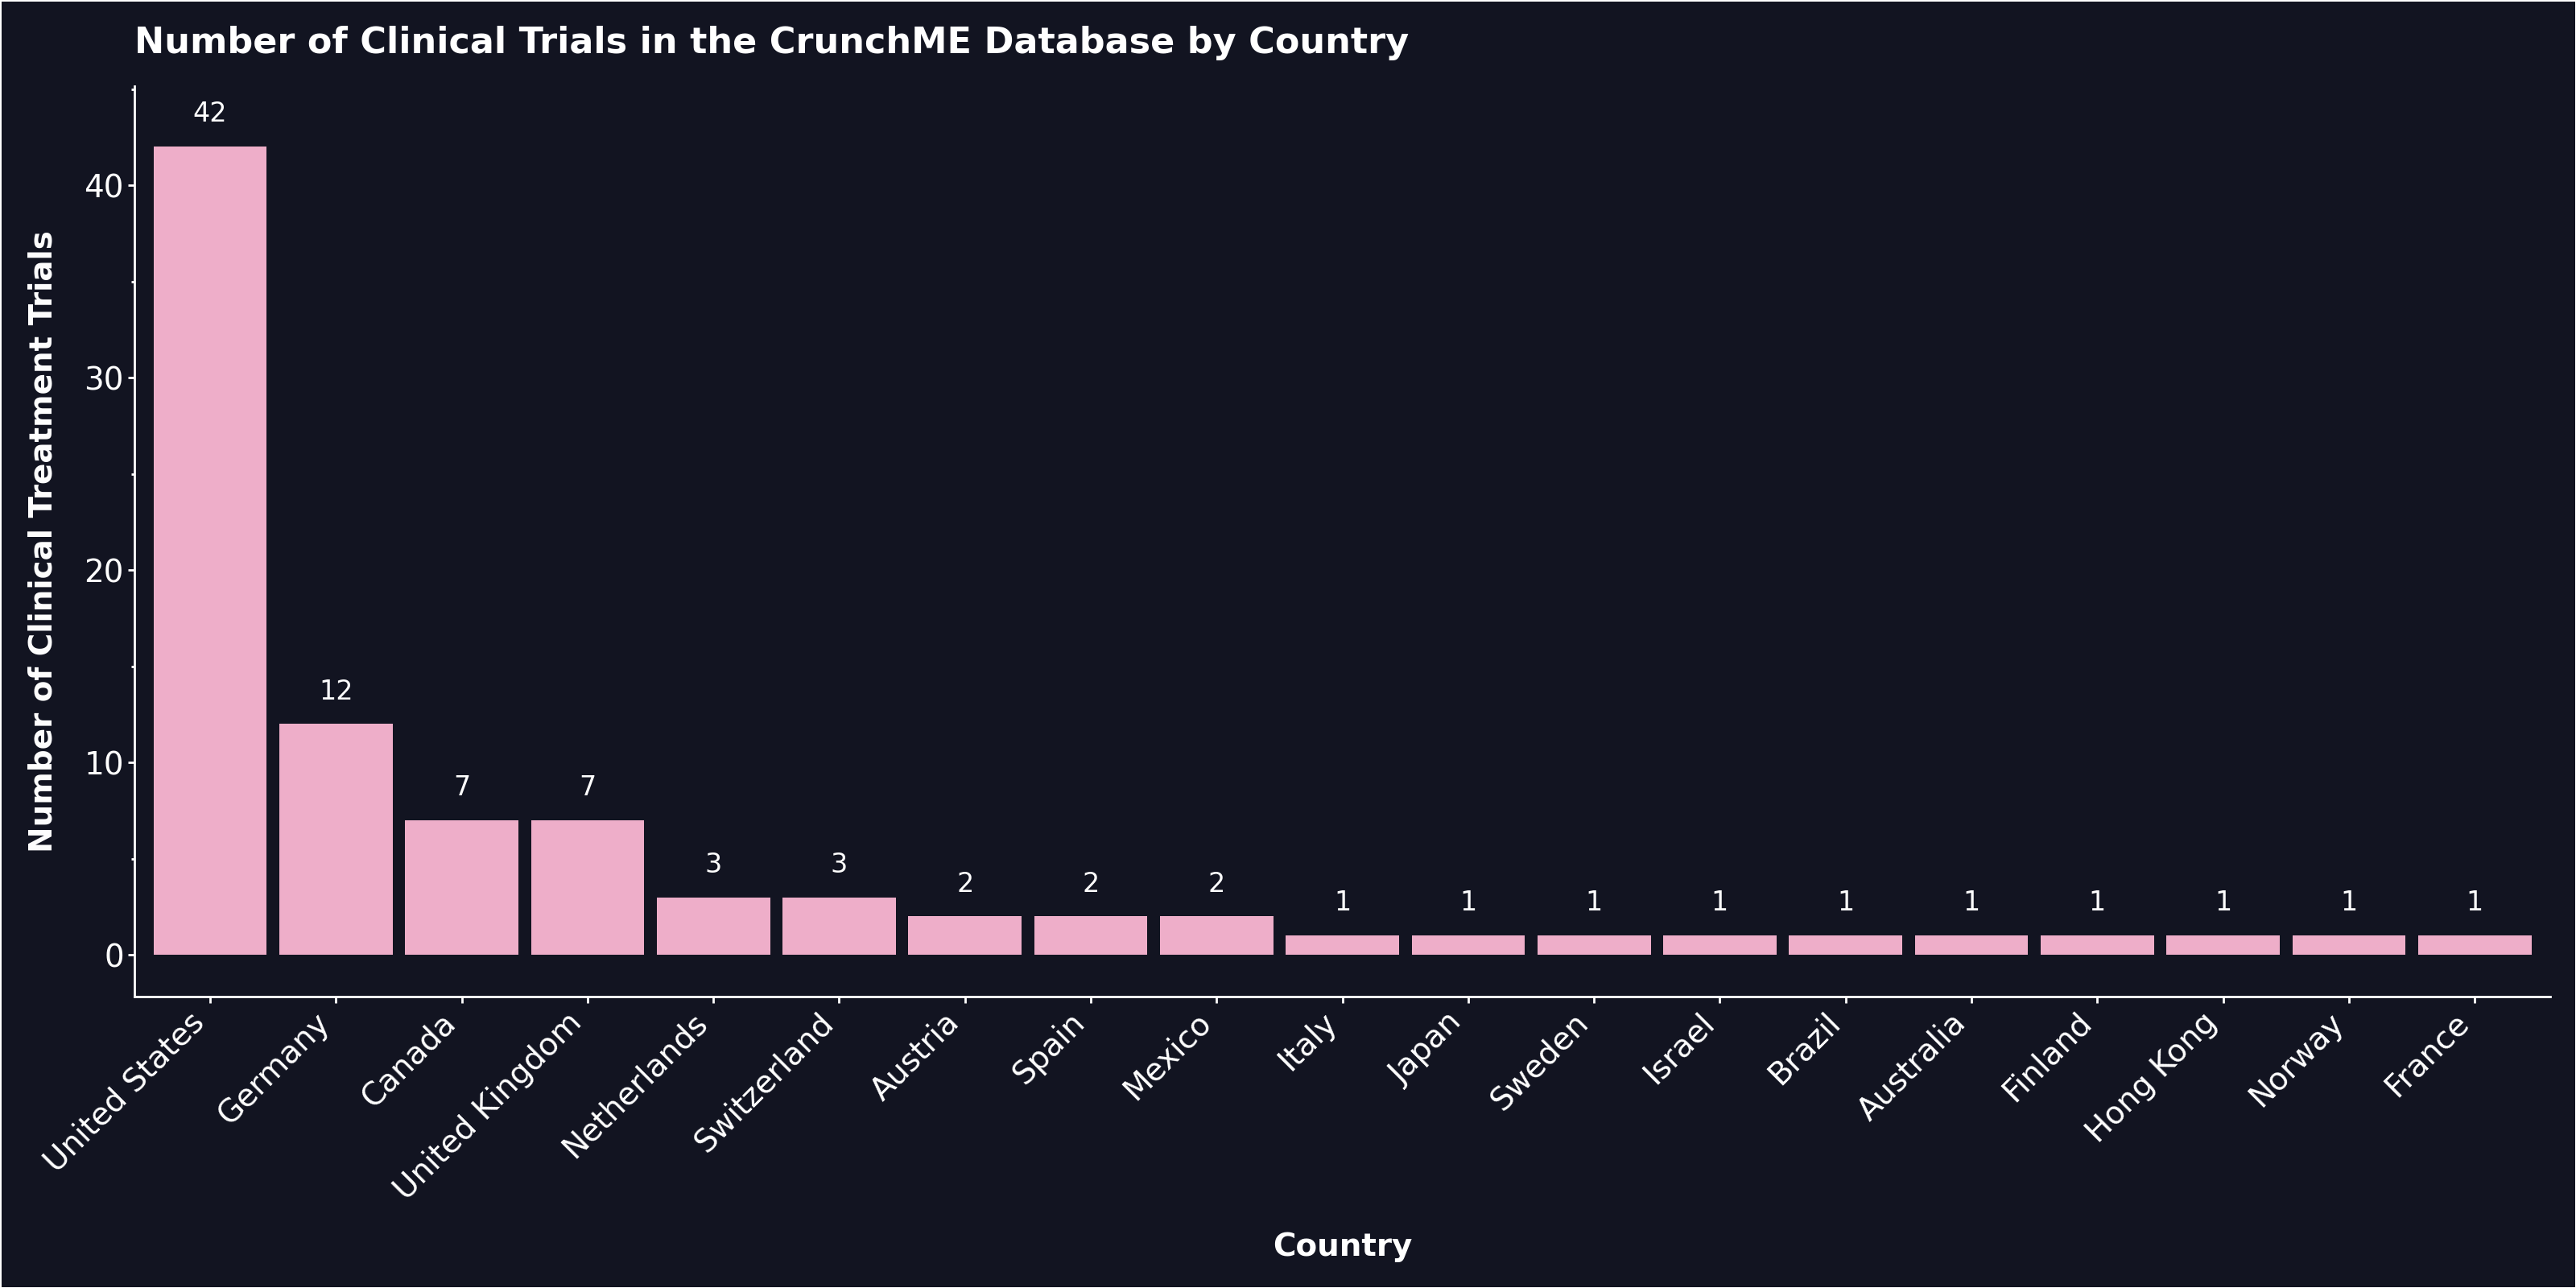

In [ ]:
# Explode the 'Trial Locations' column
df_exploded = df_trials.assign(Trial_Locations=df_trials['Trial Locations'].str.split(', ')).explode('Trial_Locations')

# Drop rows with empty Trial Locations
df_exploded = df_exploded.dropna(subset=['Trial_Locations'])

# Remove unwanted locations (e.g., 'Europe' and blanks)
df_exploded = df_exploded[~df_exploded['Trial_Locations'].isin(['Europe', ''])]

# Count occurrences of each trial location
location_counts = df_exploded['Trial_Locations'].value_counts().reset_index()
location_counts.columns = ['Trial_Locations', 'Count']

# Create the plot
plot = (
    ggplot(location_counts, aes(x='Trial_Locations', y='Count'))
    + geom_col(fill='#EEAEC9')
    + geom_text(aes(label='Count', y='Count + 1'), color='white', size=12, va='bottom')
    + labs(x='Country', y='Number of Clinical Treatment Trials', title='Number of Clinical Trials in the CrunchME Database by Country')
    + scale_x_discrete(limits=location_counts.sort_values('Count', ascending=False)['Trial_Locations'].tolist())
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=14, weight='bold', color='white'),
        axis_text_x=element_text(size=14, color='white', rotation=45, hjust=1),
        axis_text_y=element_text(size=14, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='none'
    )
)

# Render plot
plot

##### 5.2 | By Disease

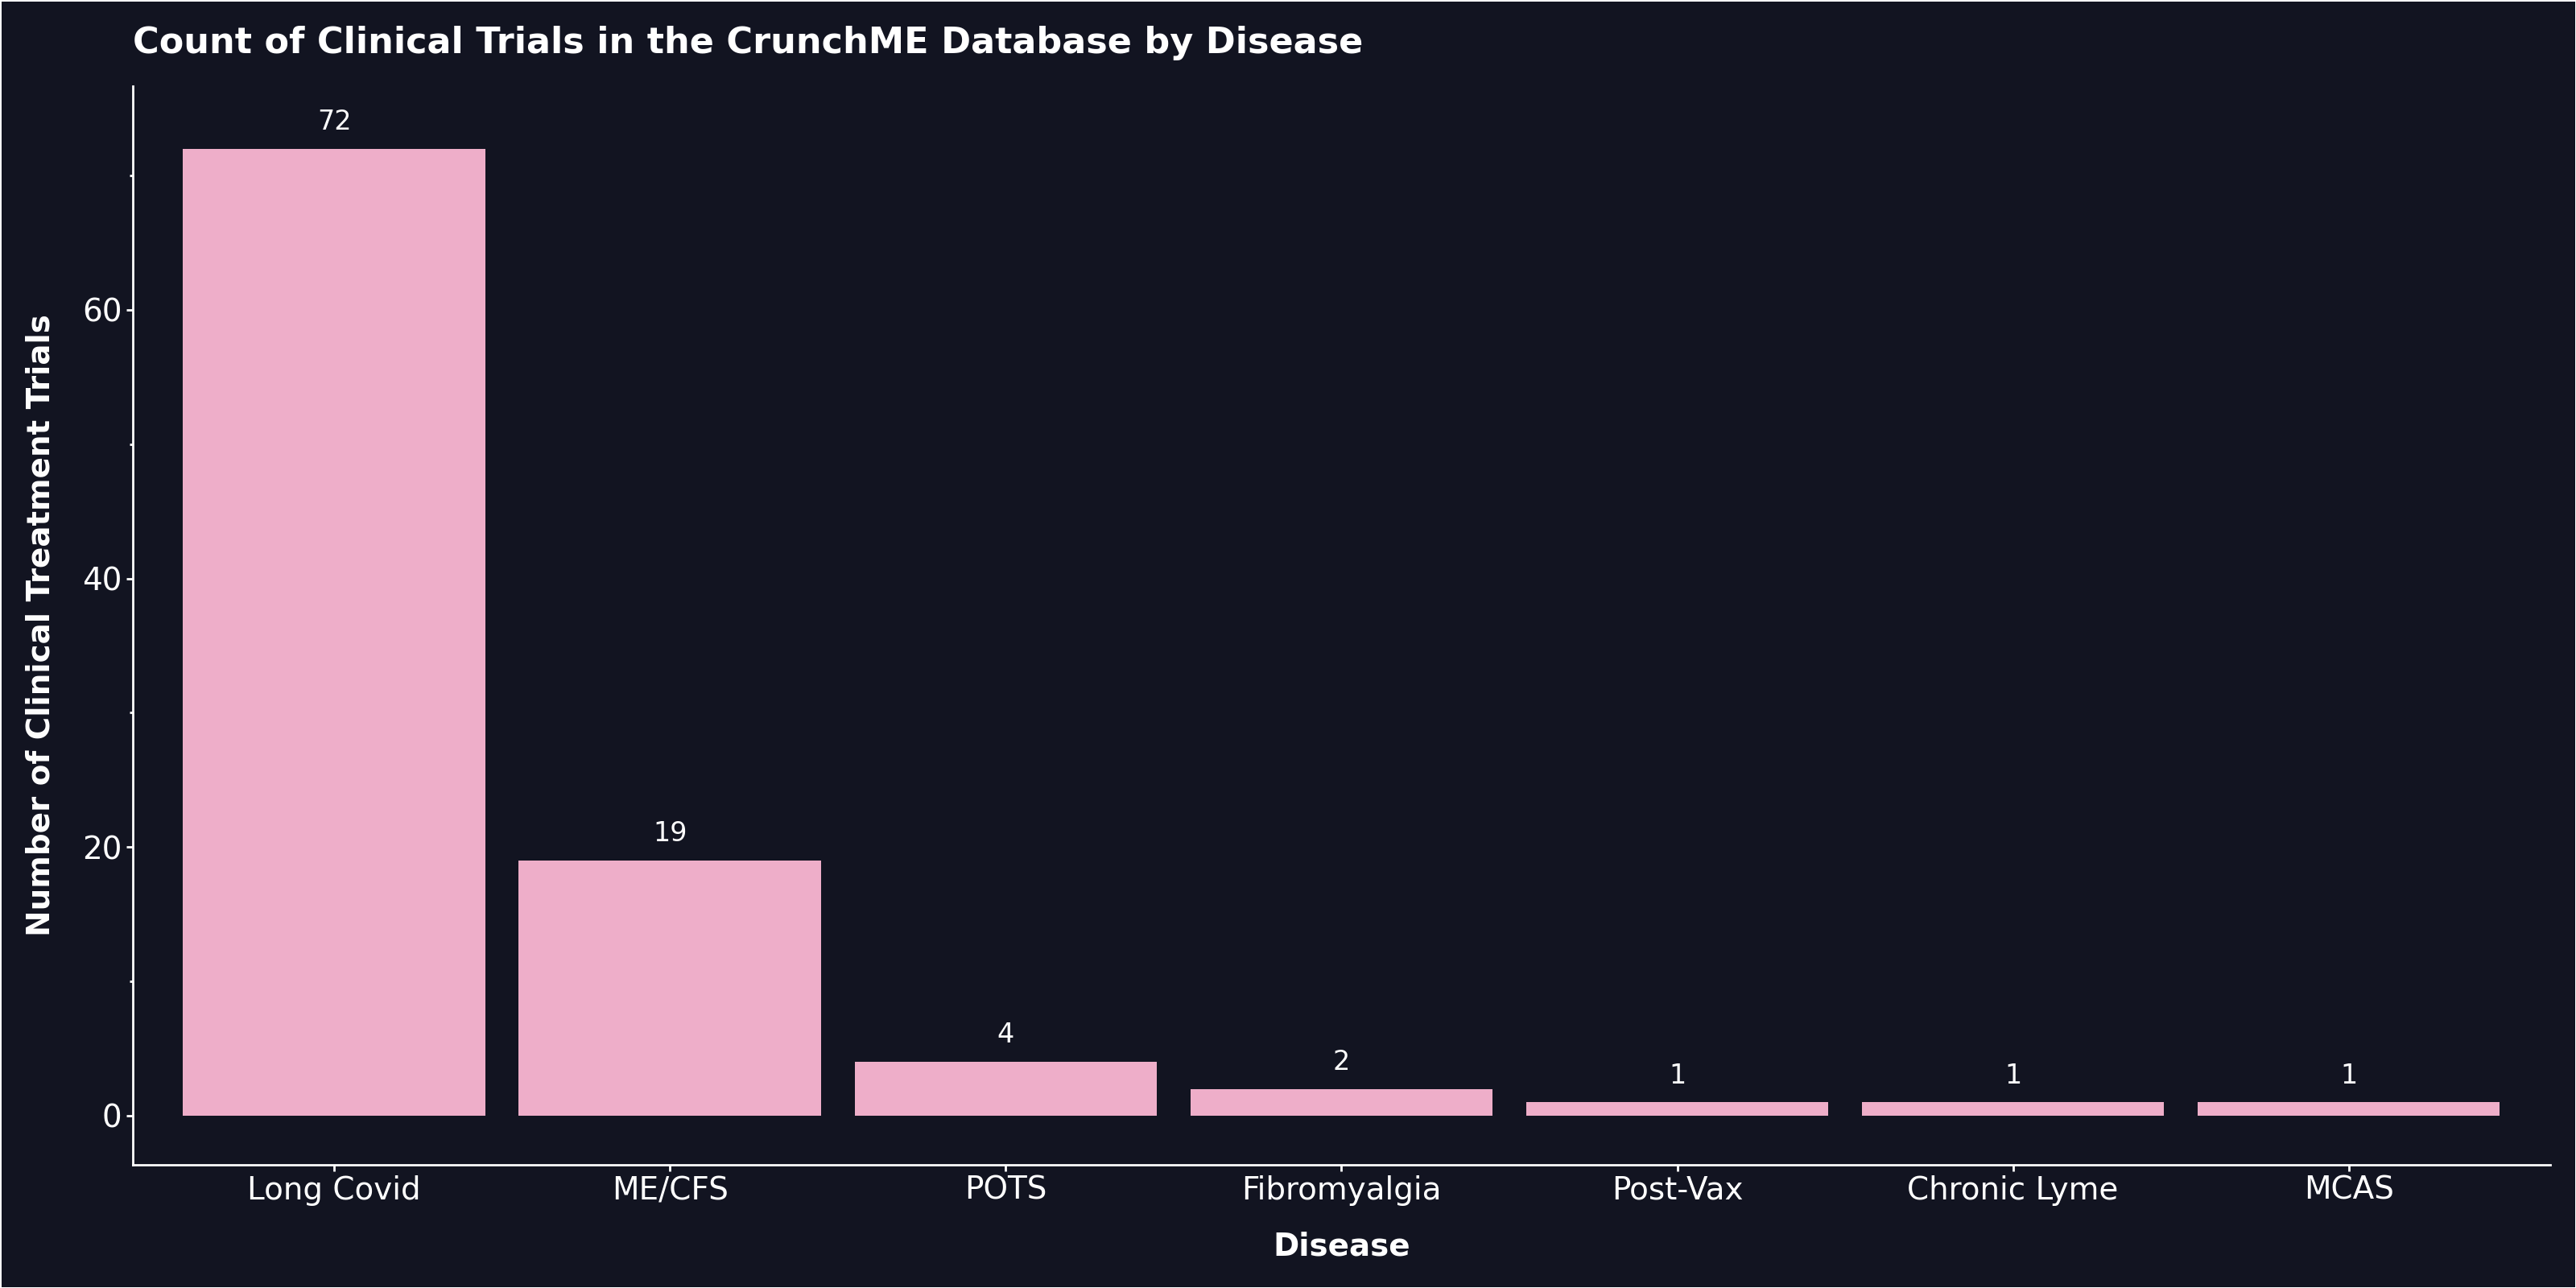

In [ ]:
# Explode the 'Disease(s)' column
df_exploded_diseases = df_trials.assign(Diseases=df_trials['Disease(s)'].str.split(', ')).explode('Diseases')

# Drop rows with empty Diseases
df_exploded_diseases = df_exploded_diseases.dropna(subset=['Diseases'])

# Merge 'ME/CFS (Post-Covid)' with 'ME/CFS'
df_exploded_diseases['Diseases'] = df_exploded_diseases['Diseases'].replace({'ME/CFS (Post-COVID)': 'ME/CFS'})

# Count occurrences of each disease
disease_counts = df_exploded_diseases['Diseases'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

# Create the plot
plot_disease = (
    ggplot(disease_counts, aes(x='Disease', y='Count'))
    + geom_col(fill='#EEAEC9')
    + geom_text(aes(label='Count', y='Count + 1'), color='white', size=12, va='bottom')
    + labs(x='Disease', y='Number of Clinical Treatment Trials', title='Count of Clinical Trials in the CrunchME Database by Disease')
    + scale_x_discrete(limits=disease_counts.sort_values('Count', ascending=False)['Disease'].tolist())
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=14, weight='bold', color='white'),
        axis_text_x=element_text(size=14, color='white'),  # No rotation
        axis_text_y=element_text(size=14, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='none'
    )
)

# Render plot
plot_disease